In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# xs = []
# for i in range(1000):
#     xs.append(
#         pd.read_csv(f'xs_{i+1}.csv', header=None).T.rename(columns={
#             0: 'x.',
#             1: 'y.',
#             2: 'z.',
#             3: 'phi.',
#             4: 'theta.',
#             5: 'psi.',
#             6: 'x',
#             7: 'y',
#             8: 'z',
#             9: 'phi',
#             10: 'theta',
#             11: 'psi',
#         })
#     )

In [3]:
xs1 = pd.read_csv('xs_1.csv', header=None).T.rename(columns={
     0: 'x.',
    1: 'y.',
    2: 'z.',
    3: 'phi.',
    4: 'theta.',
    5: 'psi.',
    6: 'x',
    7: 'y',
    8: 'z',
    9: 'phi',
    10: 'theta',
    11: 'psi',
 })

xs1000 = pd.read_csv('xs_1000.csv', header=None).T.rename(columns={
     0: 'x.',
    1: 'y.',
    2: 'z.',
    3: 'phi.',
    4: 'theta.',
    5: 'psi.',
    6: 'x',
    7: 'y',
    8: 'z',
    9: 'phi',
    10: 'theta',
    11: 'psi',
 })

In [4]:
%matplotlib widget

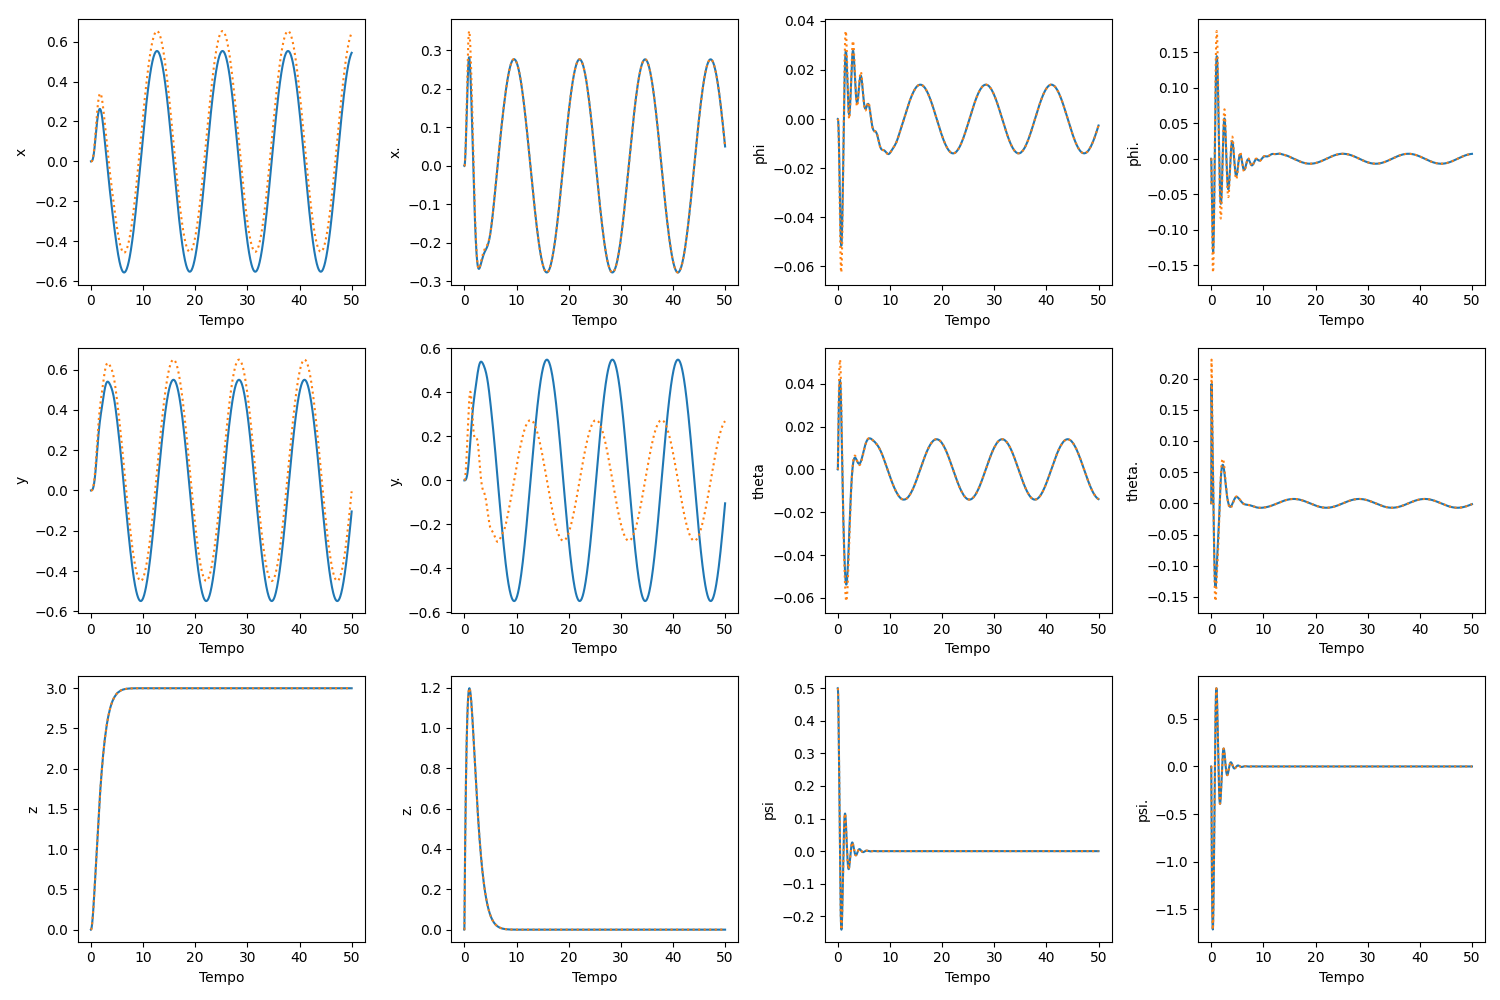

In [5]:
t = np.linspace(0,50,25001)

fig, ax = plt.subplots(3,4, figsize=(15,10))

ax[0,0].plot(t,xs1['x'], ls='-')
ax[0,0].plot(t,xs1000['x'], ls=':')
ax[0,0].set_xlabel('Tempo')
ax[0,0].set_ylabel('x')

ax[1,0].plot(t,xs1['y'], ls='-')
ax[1,0].plot(t,xs1000['y'], ls=':')
ax[1,0].set_xlabel('Tempo')
ax[1,0].set_ylabel('y')

ax[2,0].plot(t,xs1['z'], ls='-')
ax[2,0].plot(t,xs1000['z'], ls=':')
ax[2,0].set_xlabel('Tempo')
ax[2,0].set_ylabel('z')

ax[0,1].plot(t,xs1['x.'], ls='-')
ax[0,1].plot(t,xs1000['x.'], ls=':')
ax[0,1].set_xlabel('Tempo')
ax[0,1].set_ylabel('x.')

ax[1,1].plot(t,xs1['y'], ls='-')
ax[1,1].plot(t,xs1000['y.'], ls=':')
ax[1,1].set_xlabel('Tempo')
ax[1,1].set_ylabel('y.')

ax[2,1].plot(t,xs1['z.'], ls='-')
ax[2,1].plot(t,xs1000['z.'], ls=':')
ax[2,1].set_xlabel('Tempo')
ax[2,1].set_ylabel('z.')

# -------------------------

ax[0,2].plot(t,xs1['phi'],ls='-')
ax[0,2].plot(t,xs1000['phi'],ls=':')
ax[0,2].set_xlabel('Tempo')
ax[0,2].set_ylabel('phi')

ax[1,2].plot(t,xs1['theta'], ls='-')
ax[1,2].plot(t,xs1000['theta'], ls=':')
ax[1,2].set_xlabel('Tempo')
ax[1,2].set_ylabel('theta')

ax[2,2].plot(t,xs1['psi'], ls='-')
ax[2,2].plot(t,xs1000['psi'], ls=':')
ax[2,2].set_xlabel('Tempo')
ax[2,2].set_ylabel('psi')

ax[0,3].plot(t,xs1['phi.'], ls='-')
ax[0,3].plot(t,xs1000['phi.'], ls=':')
ax[0,3].set_xlabel('Tempo')
ax[0,3].set_ylabel('phi.')

ax[1,3].plot(t,xs1['theta.'], ls='-')
ax[1,3].plot(t,xs1000['theta.'], ls=':')
ax[1,3].set_xlabel('Tempo')
ax[1,3].set_ylabel('theta.')

ax[2,3].plot(t,xs1['psi.'], ls='-')
ax[2,3].plot(t,xs1000['psi.'], ls=':')
ax[2,3].set_xlabel('Tempo')
ax[2,3].set_ylabel('psi.')

fig.tight_layout()